# Analyzing networks in Python
Some of the codes are adapted from https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience, Chapter 1-2.

# Import modules

In [15]:
import networkx as nx

import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

# Les Miserables Graph
*   Nodes: Each of the characters in Les Miserables.
*   Edges: Pairs of characters co-appearing in the same chapter(s).  
https://github.com/plotly/datasets

In [16]:
lemis_url = 'https://raw.githubusercontent.com/plotly/datasets/master/miserables.json'
with urllib.request.urlopen(lemis_url) as url:
    raw_data = json.loads(url.read().decode())

nodes = raw_data['nodes']
edges = raw_data['links']

import pandas as pd
nodes_df = pd.DataFrame(nodes)
nodes_df.to_csv('nodes.csv', index=False)

nodelist = list(nodes_df['name'])
edges_df = pd.DataFrame(edges)
edgelist = [(row["source"], row["target"]) for _, row in edges_df.iterrows()]
edgelist = [(nodelist[a], nodelist[b]) for a, b in edgelist]


### Create a networkx object with the information above
https://networkx.org/documentation/networkx-1.0/tutorial/tutorial.html

In [17]:
LM_G = nx.Graph()
LM_G.add_edges_from(edgelist)

### Inspect the entire graph
- Visualization
- Measures: density, diameter

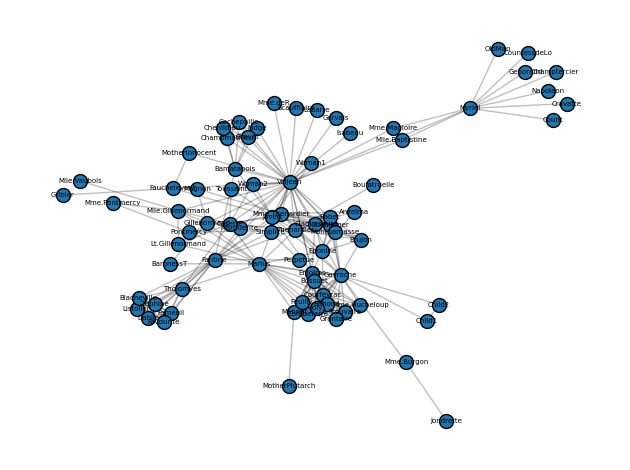

In [18]:
ax = plt.subplots()

pos = nx.spring_layout(LM_G, seed=200)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in LM_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(LM_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

In [19]:
LM_G.number_of_nodes()

77

In [20]:
LM_G.number_of_edges()

254

In [21]:
nx.density(LM_G)

0.08680792891319207

In [22]:
nx.diameter(LM_G)

5

In [56]:
nx.transitivity(LM_G)

0.49893162393162394

### Inspect node-level measures
- Degree
- Centrality

In [23]:
LM_G.degree('Valjean')

36

In [24]:
df = pd.DataFrame( nx.degree(LM_G), columns=['node', 'degree'] )
df.sort_values('degree', ascending=False)

,node,degree
10,Valjean,36
48,Gavroche,22
55,Marius,19
27,Javert,17
25,Thenardier,16
...,...,...
13,Mme.deR,1
53,Mlle.Vaubois,1
45,Gribier,1
47,Jondrette,1


In [25]:
nx.degree_centrality(LM_G)['Valjean']

0.47368421052631576

In [26]:
nx.betweenness_centrality(LM_G)['Valjean']

0.5699890527836184

In [27]:
nx.closeness_centrality(LM_G)['Valjean']

0.6440677966101694

In [52]:
nx.eigenvector_centrality(LM_G)['Valjean'], nx.pagerank(LM_G)['Valjean']

(0.2676181759885394, 0.07543374445332475)

In [29]:
betweenness_dict = nx.betweenness_centrality(LM_G)

for _, row in df.iterrows():
    character = row['node']
    betweenness = betweenness_dict[character]
    df.loc[df['node'] == character, 'betweenness'] = betweenness

In [30]:
df.sort_values('betweenness', ascending=False)

,node,degree,betweenness
10,Valjean,36,0.569989
1,Myriel,10,0.176842
48,Gavroche,22,0.165113
55,Marius,19,0.132032
23,Fantine,15,0.129645
...,...,...,...
67,MotherPlutarch,1,0.000000
72,Toussaint,3,0.000000
73,Child1,2,0.000000
74,Child2,2,0.000000


In [31]:
nx.shortest_path(LM_G, 'Valjean', 'Napoleon')

['Valjean', 'Myriel', 'Napoleon']

### Clustering Coefficient

In [55]:
nx.clustering(LM_G)['Valjean']

0.12063492063492064

## community detection (Louvain algorithm)
https://github.com/taynaud/python-louvain

In [32]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community_louvain.best_partition(LM_G)

In [33]:
partition

{'Napoleon': 0,
 'Myriel': 0,
 'Mlle.Baptistine': 0,
 'Mme.Magloire': 0,
 'CountessdeLo': 0,
 'Geborand': 0,
 'Champtercier': 0,
 'Cravatte': 0,
 'Count': 0,
 'OldMan': 0,
 'Valjean': 2,
 'Labarre': 2,
 'Marguerite': 2,
 'Mme.deR': 2,
 'Isabeau': 2,
 'Gervais': 2,
 'Listolier': 1,
 'Tholomyes': 1,
 'Fameuil': 1,
 'Blacheville': 1,
 'Favourite': 1,
 'Dahlia': 1,
 'Zephine': 1,
 'Fantine': 1,
 'Mme.Thenardier': 4,
 'Thenardier': 4,
 'Cosette': 5,
 'Javert': 4,
 'Fauchelevent': 2,
 'Bamatabois': 2,
 'Perpetue': 1,
 'Simplice': 1,
 'Scaufflaire': 2,
 'Woman1': 2,
 'Judge': 2,
 'Champmathieu': 2,
 'Brevet': 2,
 'Chenildieu': 2,
 'Cochepaille': 2,
 'Pontmercy': 5,
 'Boulatruelle': 4,
 'Eponine': 4,
 'Anzelma': 4,
 'Woman2': 2,
 'MotherInnocent': 2,
 'Gribier': 2,
 'Mme.Burgon': 3,
 'Jondrette': 3,
 'Gavroche': 3,
 'Gillenormand': 5,
 'Magnon': 5,
 'Mlle.Gillenormand': 5,
 'Mme.Pontmercy': 5,
 'Mlle.Vaubois': 5,
 'Lt.Gillenormand': 5,
 'Marius': 5,
 'BaronessT': 5,
 'Mabeuf': 3,
 'Enjolras': 

/tmp/ipython-input-3450641928.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


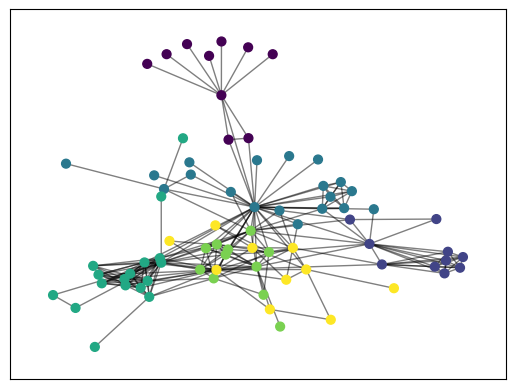

In [34]:
# draw the graph
pos = nx.spring_layout(LM_G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(LM_G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(LM_G, pos, alpha=0.5)
plt.show()

# Directed graphs

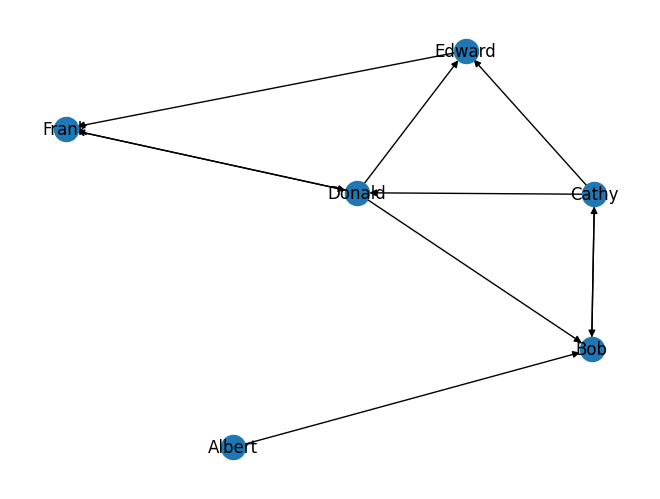

In [35]:
D = nx.DiGraph()

D.add_edges_from([('Albert','Bob'),('Bob', 'Cathy'),('Cathy','Bob'),('Cathy','Donald'),
 ('Cathy', 'Edward'),('Donald','Edward'),('Donald','Frank'),('Edward','Frank'),('Frank','Donald'),('Donald','Bob')])

nx.draw(D, with_labels=True)

Shortest paths

In [36]:
nx.shortest_path(D, 'Edward', 'Bob')

['Edward', 'Frank', 'Donald', 'Bob']

Diameter

In [37]:
nx.diameter(D)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [38]:
largest_cc = max(nx.strongly_connected_components(D), key=len)
subgraph = D.subgraph(largest_cc)

In [39]:
subgraph.nodes()

NodeView(('Bob', 'Cathy', 'Donald', 'Edward', 'Frank'))

In [40]:
subgraph.edges()

OutEdgeView([('Bob', 'Cathy'), ('Cathy', 'Bob'), ('Cathy', 'Donald'), ('Cathy', 'Edward'), ('Donald', 'Edward'), ('Donald', 'Frank'), ('Donald', 'Bob'), ('Edward', 'Frank'), ('Frank', 'Donald')])

In [41]:
nx.diameter(subgraph)

4

## Some Metrics

Network density

In [46]:
nx.density(D)

0.3333333333333333

Degree centrality

In [47]:
nx.in_degree_centrality(D)

{'Albert': 0.0,
 'Bob': 0.6000000000000001,
 'Cathy': 0.2,
 'Donald': 0.4,
 'Edward': 0.4,
 'Frank': 0.4}

In [48]:
nx.out_degree_centrality(D)

{'Albert': 0.2,
 'Bob': 0.2,
 'Cathy': 0.6000000000000001,
 'Donald': 0.6000000000000001,
 'Edward': 0.2,
 'Frank': 0.2}

Betweenness centrality

In [49]:
nx.betweenness_centrality(D, normalized=False)

{'Albert': 0.0,
 'Bob': 7.0,
 'Cathy': 6.0,
 'Donald': 6.5,
 'Edward': 1.5,
 'Frank': 3.0}

# On your Own (1):
By running below code, you will get a NetworkX object KC_G that contains the network collected from the members of a university karate club by Wayne Zachary. Zachary (1977) used these data and an information flow model of network conflict resolution to explain the split-up of this group following disputes among the members.
- https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html
- http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm
- Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.


(1) How many nodes and edges are there?  
(2) What is the name of the node with the highest degree?  
(3) What is the name of the node with the highest {degree, betweenness, closeness, eigenvector} centrality?  
(4) Calculate the network density and diameter.  
(5) Visualize the network. How does it look compared to Les Miserables graph?  
(6) Run community detection and find the best partition using Louvain algorithm. How many communities are detected?

In [45]:
KC_G = nx.karate_club_graph()